## Graphing Trends By Country

In [27]:
import pandas as pd
import os, re
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
dir = 'summary/'
for file in os.listdir(dir):
    if re.match(r'^summary.\w*.csv$', file):
        name = file.split('.')[1].capitalize()
        path = dir + file
        data = pd.read_csv(path, index_col='Name')
        clean_data = data.sort_index()
        clean_data.index = [re.search(r'\d{4}-\d{4}|\d{3}|[A-Z]\w+', x).group(0) for x in clean_data.index.values]
        print(clean_data.index.values)


['1994-1995' '1995-1999' '1999-2002' '2002-2006' '2006-2008' '2008-2013'
 '2013-2018']
['1986-1988' '1988-1993' '1997-2002' '2002-2007' '2007-2012' '2012-2017'
 '1986-1988' '1988-1993' '1993-1997' '1997-2002' '2002-2007' '2007-2012'
 '2012-2017']
['2013-2018']
['Agriculture' 'Culture' 'Economy' 'Education' 'Environment'
 'Foreign_Affairs' 'Health' 'Housing' 'Immigration' 'Institutional'
 'Justice' 'Technology' 'Welfare']
['113' '114' '115']
['1995-1999' '1999-2003' '2003-2007' '2007-2011' '2011-2015' '1995-1999'
 '1999-2003' '2003-2007' '2007-2011' '2011-2015']
['1988-1991' '1991-1994' '1994-1998' '1998-2002' '2002-2006' '2006-2010'
 '2010-2014' '2014-2018']


In [186]:
file = 'summary/summary.austria.csv'
if re.match(r'^summary.\w*.csv$', file):
    name = file.split('.')[1].capitalize()
    data = pd.read_csv(file)
    clean_data = data.sort_index()
    clean_data.index = [re.search(r'\d{4}-\d{4}', x).group(0) for x in clean_data.index.values]

In [187]:
clean_data

,Number of Edges,Number of Vertices,Clustering Coefficient,Average Degree,Average Excess Degree,Average Distance,Size of LCC,Number of CC
1988-1991,5418,379,0.430185,28.591029,35.383810,2.995337,355,25
1991-1994,5023,375,0.378199,26.789333,35.613023,3.094428,343,33
1994-1998,4922,398,0.451830,24.733668,31.210185,3.140271,375,24
1998-2002,5825,380,0.459292,30.657895,38.910313,3.037874,365,16
2002-2006,6094,395,0.489200,30.855696,40.030720,3.049676,371,25
2006-2010,5363,390,0.421502,27.502564,40.173271,3.301576,355,36
2010-2014,4691,387,0.510669,24.242894,37.367521,4.573035,324,43
2014-2018,2748,368,0.492796,14.934783,20.831532,3.633376,152,55


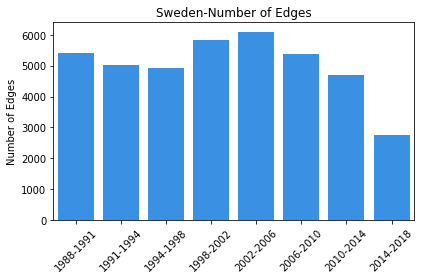

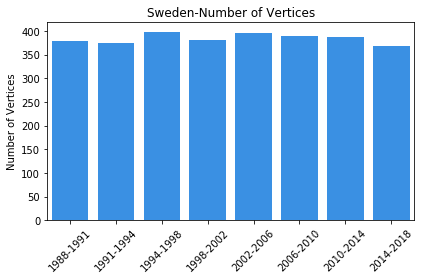

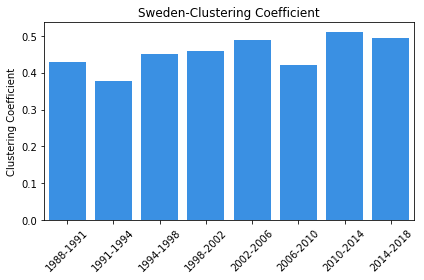

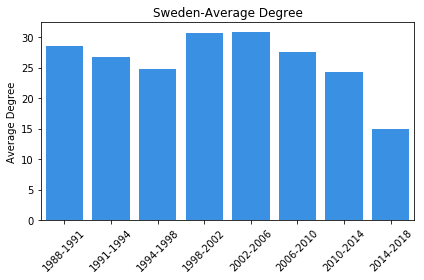

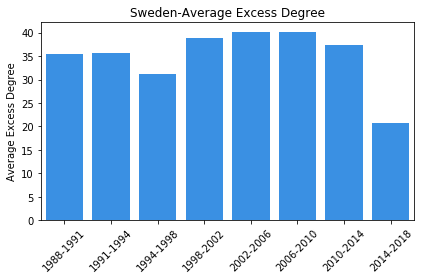

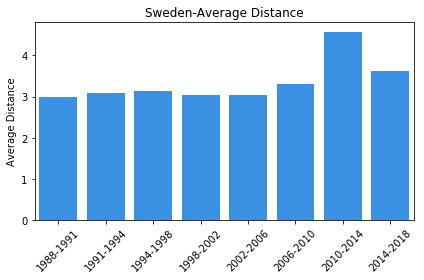

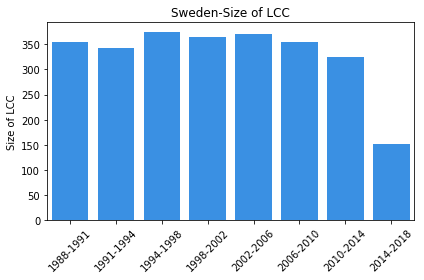

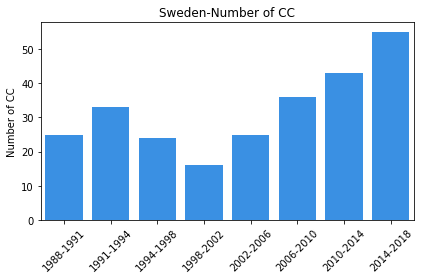

In [214]:
for count, i in enumerate(clean_data.columns):
    y_label = list(clean_data.columns.values)[count]
    plt.figure()
    plot = sns.barplot(x = clean_data.index, y = y_label, data = clean_data[[i]], color = "dodgerblue")
    plt.xticks(rotation=45)
    plot_name = name + "-"+ y_label
    plt.title(plot_name)
    plt.tight_layout()
    save_path = 'plots/stats/' + name + "/" + plot_name
    fig = plot.get_figure()
    fig.savefig(save_path)